In [24]:
from matplotlib import pyplot as plt

import torch

import pyro
from pyro.infer.mcmc import MCMC
import pyro.distributions as dist
from pyro.infer.mcmc import HMC as HMC_Pyro

from hmc import HMC as HMC_Local

Define a toy model with some data

In [25]:
def model(data):
    loc = pyro.sample("loc", dist.Normal(0,1))
    return pyro.sample("out", dist.Normal(loc, 1), obs=data)

data = torch.tensor([1])

Run our HMC implementation with the model and data.

In [32]:
hmc_local = HMC_Local(model, step_size=0.5)
mcmc_local = MCMC(hmc_local, num_samples=1000)
mcmc_local.run(data)
samples_local = mcmc_local.get_samples()

Sample: 100%|██████████| 2000/2000 [00:26, 75.26it/s]


Run Pyro's HMC with the model and data.

In [34]:
hmc_pyro = HMC_Pyro(model)
mcmc_pyro = MCMC(hmc_pyro, num_samples=1000)
mcmc_pyro.run(data)
samples_pyro = mcmc_pyro.get_samples()

Sample: 100%|██████████| 2000/2000 [00:16, 119.34it/s, step size=9.92e-01, acc. prob=0.977]


Compare the two on top of each other.

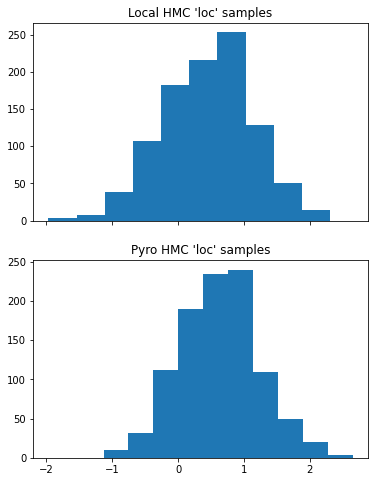

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
with torch.no_grad():
    axs[0].hist(samples_local["loc"].numpy())
    axs[0].set(title="Local HMC 'loc' samples")
    axs[1].hist(samples_pyro["loc"].numpy())
    axs[1].set(title="Pyro HMC 'loc' samples")
plt.show()